In [42]:
import numpy as np 
import matplotlib.pyplot as plt

# List of region of interest (ROI) names in the brain.
roi_names = ['V1', 'V2', 'V3', 'V3A', 'V3B', 'V3CD', 'V4', 'LO1', 'LO2', 'LO3', 'PIT', 'V4t', 'V6', 'V6A', 'V7', 'V8', 'PH', 'FFC', 'IP0', 'MT', 
'MST', 'FST', 'VVC', 'VMV1', 'VMV2', 'VMV3', 'PHA1', 'PHA2', 'PHA3', 'TE2p', 'IPS1']

# Dictionary to store region information.
roi_dict = {name: idx for idx, name in enumerate(roi_names, 1)}

# Load the visual cortex (VC) mask from a .npy file.
vc_roi_mask = np.load("../NSD_full_brain/vc_masks.npy")

# Function to create a mask based on a list of ROI names.
def mask_with_vc_roi(roi_names):
    mask = np.zeros_like(vc_roi_mask, dtype=bool)
    for roi_name in roi_names:
        roi_level_value = roi_dict[roi_name]
        roi_mask = vc_roi_mask == roi_level_value
        mask = mask | roi_mask
    return mask

Primary_Visual = ['V1']

Early_Visual = ['V2','V3','V4']

Dorsal_Stream_Visual = ['V3A','V3B','V6','V6A','V7','IPS1']

Ventral_Stream_Visual = ['FFC','PIT','V8','VMV1','VMV2','VMV3','VVC']

MT_Complex = ['LO1','LO2','LO3','FST','MT','MST','PH','V3CD','V4t']

Medial_Temporal = ['PHA1','PHA2','PHA3']

Lateral_Temporal = ['TE2p']

Inferior_Parietal = ['IP0']

"""
Inputs: exchange_roi_names
"""
exchange_roi_names = Primary_Visual
# exchange_roi_names = Early_Visual
# exchange_roi_names =  Dorsal_Stream_Visual+Ventral_Stream_Visual+MT_Complex+Medial_Temporal+Lateral_Temporal+Inferior_Parietal
surface = np.load('../NSD/fmri_npy/01_norm/surf_000000.npy') # fmri surface from sub-1
exchange_surface = np.load('../NSD/fmri_npy/02_norm/surf_000000.npy') # fmri surface from sub-2


# Generate a mask for the specified ROIs.
exchange_mask = mask_with_vc_roi(exchange_roi_names)

# Use the exchange mask to update the surface.  If exchange_mask is True, take values from exchange_surface; otherwise, from surface.
new_surface = np.where(exchange_mask, exchange_surface, surface)

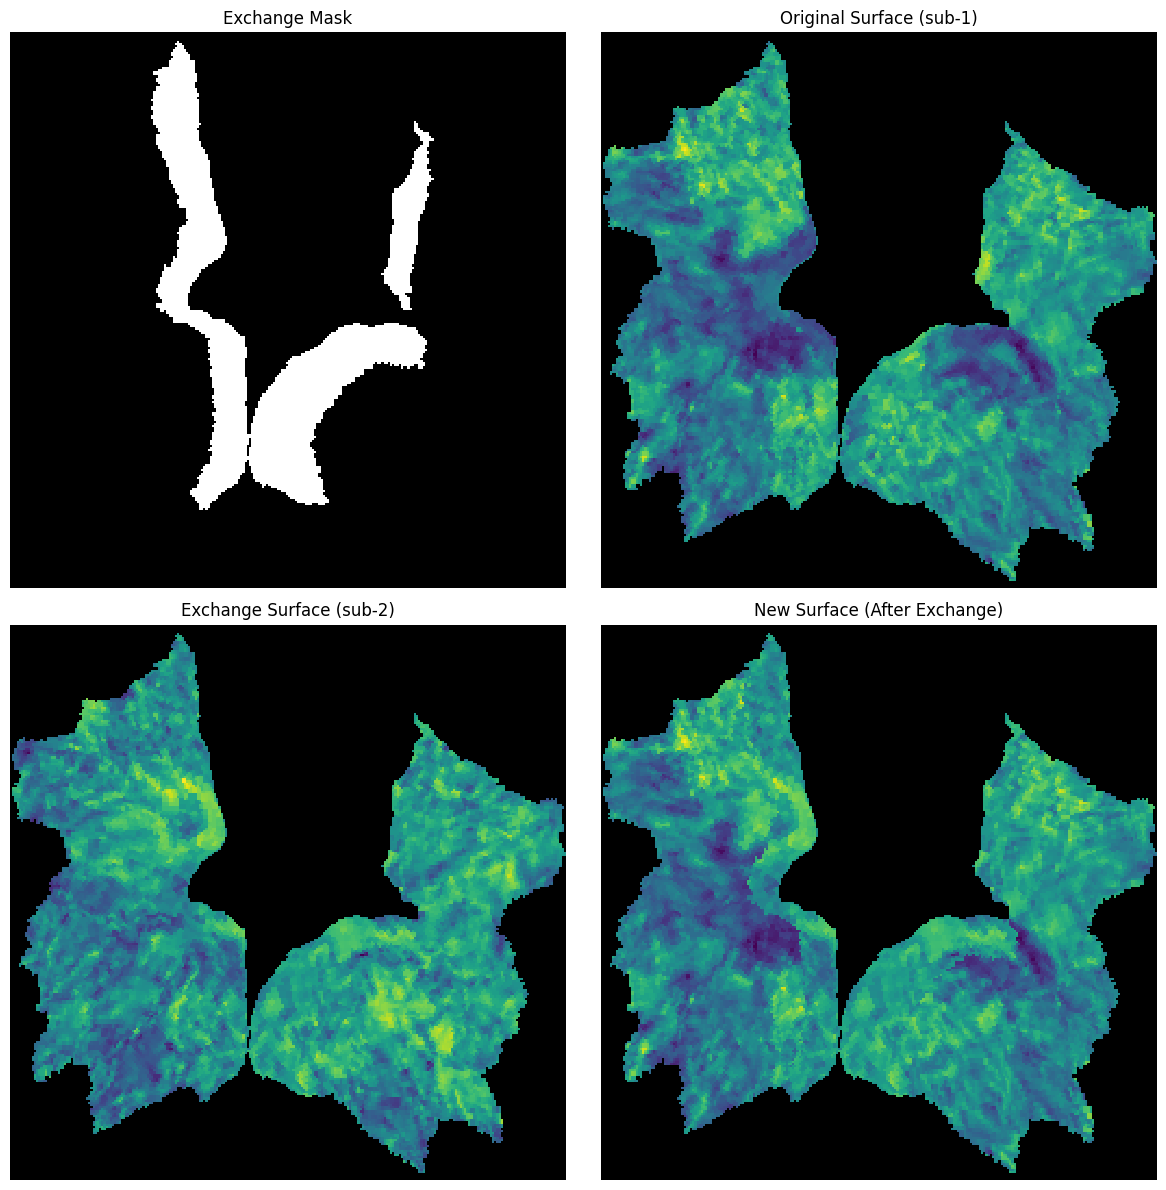

In [43]:
# Function to visualize the surface and mask
def visualize_surfaces_and_mask(surface, exchange_surface, new_surface, exchange_mask):
    surface[vc_roi_mask == 0] = np.nan
    exchange_surface[vc_roi_mask == 0] = np.nan
    new_surface[vc_roi_mask == 0] = np.nan

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Plot the exchange mask
    ax = axes[0, 0]
    ax.imshow(exchange_mask, cmap='gray', interpolation='None')
    ax.set_title("Exchange Mask")
    ax.axis('off')

    cmap = plt.cm.viridis
    cmap.set_bad(color='black')

    # Plot the original surface (sub-1)
    ax = axes[0, 1]
    ax.imshow(surface, cmap=cmap, interpolation='None')
    ax.set_title("Original Surface (sub-1)")
    ax.axis('off')

    # Plot the exchange surface (sub-2)
    ax = axes[1, 0]
    ax.imshow(exchange_surface, cmap=cmap, interpolation='None')
    ax.set_title("Exchange Surface (sub-2)")
    ax.axis('off')

    # Plot the new surface after applying the mask
    ax = axes[1, 1]
    ax.imshow(new_surface, cmap=cmap, interpolation='None')
    ax.set_title("New Surface (After Exchange)")
    ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_surfaces_and_mask(surface, exchange_surface, new_surface, exchange_mask)